# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [126]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [127]:
import pandas as pd
# Step 1: Install the library
!pip install palmerpenguins

# Step 2: Import and load the dataset
from palmerpenguins import load_penguins
penguins = load_penguins()

# Step 3: View the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [128]:
#penguins_dummies = pd.get_dummies(penguins[['species','island','sex']])
#penguins = pd.concat([penguins, penguins_dummies], axis=1)
#penguins.head()

In [129]:
penguins = penguins.dropna()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [130]:
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()
#Label X and Y axis and train and test the data
#from sklearn.model_selection import train_test_split
#X = penguins[['sex_female','flipper_length_mm']]
#y = penguins['bill_depth_mm']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)lr_fit = lr.fit(X_train, y_train)
#train_preds = lr_fit.predict(X_train)
#test_preds = lr_fit.predict(X_test)

Using flipper length and penguin sex to predict bill_depth

In [131]:
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [133]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["flipper_length_mm"])
  ],
  remainder = "drop"
)

# creating the pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['flipper_length_mm'])])),
                ('linear_regression', LinearRegression())])

In [134]:
pipeline_fit = lr_pipeline.fit(X_train, y_train)

In [135]:
# Predict models
predict_trainx = lr_pipeline.predict(X_train)
predict_testx = lr_pipeline.predict(X_test)

In [136]:
mse_test=mean_squared_error(y_test, predict_testx)
mse_test

1.3261704406582546

In [137]:
mse_train=mean_squared_error(y_train, predict_trainx)
mse_train

1.5016591503155008

In [138]:
df =[]
df.append({
    "Flexibility": 2,
    "MSE_Train": mse_train,
    "MSE_Test": mse_test
})

Using flipper length and penguin sex and island to predict bill_depth

In [139]:
ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("standardize", StandardScaler(), ["flipper_length_mm"])
  ],
  remainder = "drop"
)

# creating the pipeline
lr_pipeline2 = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
)

lr_pipeline2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'island']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['flipper_length_mm'])])),
                ('linear_regression', LinearRegression())])

In [140]:
pipeline_fit2 = lr_pipeline2.fit(X_train, y_train)

In [141]:
predict_trainx2 = lr_pipeline2.predict(X_train)
predict_testx2 = lr_pipeline2.predict(X_test)

In [142]:
mse_test2=mean_squared_error(y_test, predict_testx2)
mse_test2

1.1979107085852558

In [143]:
mse_train2=mean_squared_error(y_train, predict_trainx2)
mse_train2

1.2198094724845048

In [144]:
df.append({
    "Flexibility": 3,
    "MSE_Train": mse_train2,
    "MSE_Test": mse_test2
})


Using flipper length, penguin sex, island, and species to predict bill_depth

In [145]:
ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
    ("standardize", StandardScaler(), ["flipper_length_mm"])
  ],
  remainder = "drop"
)

# creating the pipeline
lr_pipeline3 = Pipeline(
  [("preprocessing", ct3),
  ("linear_regression", LinearRegression())]
)

lr_pipeline3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'island', 'species']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['flipper_length_mm'])])),
                ('linear_regression', LinearRegression())])

In [146]:
pipeline_fit3 = lr_pipeline3.fit(X_train, y_train)

In [147]:
predict_trainx3 = lr_pipeline3.predict(X_train)
predict_testx3 = lr_pipeline3.predict(X_test)

In [148]:
mse_test3=mean_squared_error(y_test, predict_testx3)
mse_test3

0.6606365885053361

In [149]:
mse_train3=mean_squared_error(y_train, predict_trainx3)
mse_train3

0.644624099425044

In [150]:
df.append({
    "Flexibility": 4,
    "MSE_Train": mse_train3,
    "MSE_Test": mse_test3
})

Using flipper length, bill length, penguin sex, island and species  to predict bill_depth

In [151]:
ct4 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "bill_length_mm"])
  ],
  remainder = "drop"
)

# creating the pipeline
lr_pipeline4 = Pipeline(
  [("preprocessing", ct4),
  ("linear_regression", LinearRegression())]
)

lr_pipeline4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'island', 'species']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['flipper_length_mm',
                                                   'bill_length_mm'])])),
                ('linear_regression', LinearRegression())])

In [152]:
pipeline_fit4 = lr_pipeline4.fit(X_train, y_train)

In [153]:
predict_trainx4 = lr_pipeline4.predict(X_train)
predict_testx4 = lr_pipeline4.predict(X_test)

In [154]:
mse_test4=mean_squared_error(y_test, predict_testx4)
mse_test4

0.6578821454729351

In [155]:
mse_train4=mean_squared_error(y_train, predict_trainx4)
mse_train4

0.6304091586070846

In [156]:
df.append({
    "Flexibility": 5,
    "MSE_Train": mse_train4,
    "MSE_Test": mse_test4
})

In [157]:
df = pd.DataFrame(df)
df

,Flexibility,MSE_Train,MSE_Test
0,2,1.501659,1.326170
1,3,1.219809,1.197911
2,4,0.644624,0.660637
3,5,0.630409,0.657882


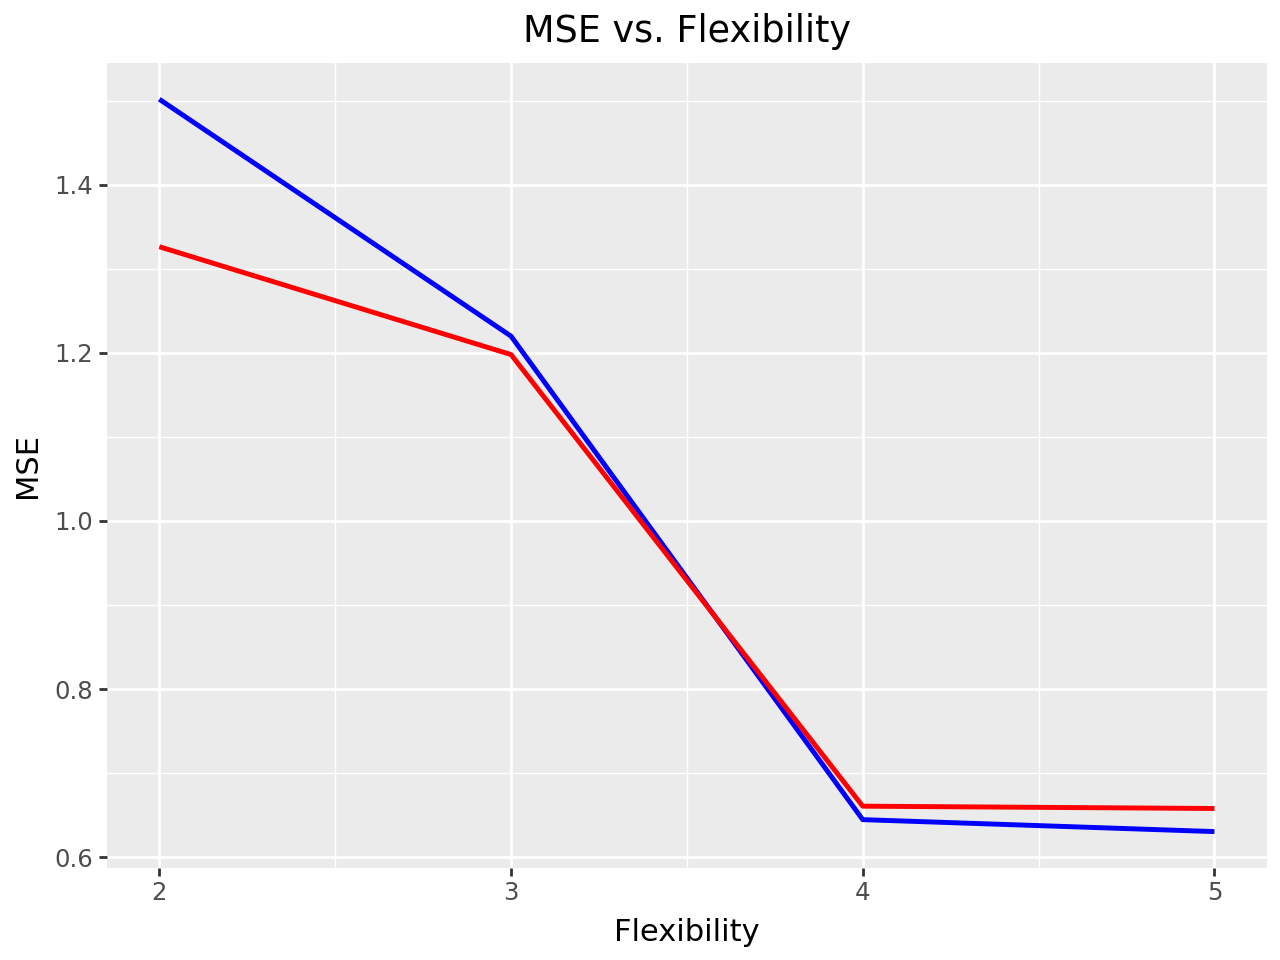

In [159]:
from plotnine import ggplot, aes, geom_line, labs

# Assuming df is your DataFrame and 'Flexibility', 'MSE_Train', 'MSE_Test' are column names
(ggplot(df, aes(x='Flexibility'))
    + geom_line(aes(y='MSE_Train'), color='blue', size=1, linetype='solid')
    + geom_line(aes(y='MSE_Test'), color='red', size=1, linetype='solid')
    + labs(x='Flexibility', y='MSE', title='MSE vs. Flexibility')
)


The best model would be the last model with the most variables because it has the lowest MSE.
